## **Faster R-CNN**

Latihan ini menggunakan backbone: [Resnet](https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html) dari pytorch,
Menggunakan model yang sudah dilatih pada [coco](https://cocodataset.org/#home) dataset.

### **Import Library**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches



### **Load Model**

In [ ]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

### **Load Image**

saya ambil gambar dari : https://www.kaggle.com/datasets/sabahesaraki/2017-2017

In [ ]:
img=Image.open('/content/000000000016.jpg')

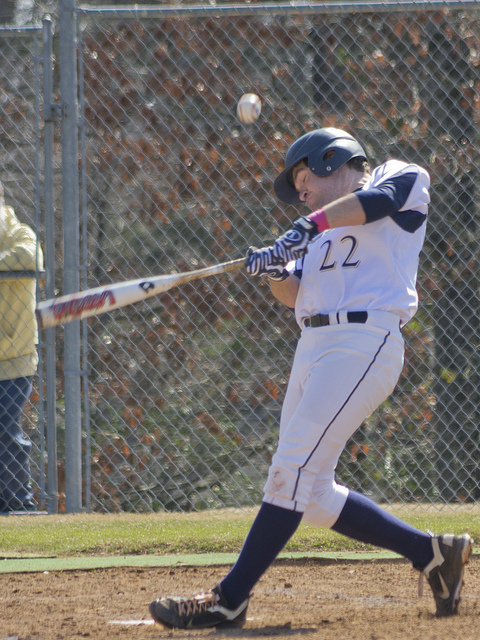

In [ ]:
img

In [ ]:
transform=transforms.ToTensor()
img=transform(img)

In [ ]:
img

tensor([[[0.2784, 0.2745, 0.2667,  ..., 0.6588, 0.6549, 0.6549],
         [0.3020, 0.2824, 0.2863,  ..., 0.4667, 0.4275, 0.4157],
         [0.2980, 0.2863, 0.2863,  ..., 0.3529, 0.4275, 0.3608],
         ...,
         [0.6510, 0.5922, 0.6431,  ..., 0.6549, 0.7098, 0.7098],
         [0.6196, 0.6588, 0.6863,  ..., 0.6706, 0.7020, 0.7216],
         [0.6902, 0.7020, 0.6902,  ..., 0.7294, 0.7176, 0.7451]],

        [[0.2745, 0.2706, 0.2706,  ..., 0.6549, 0.6627, 0.6863],
         [0.2980, 0.2784, 0.2902,  ..., 0.5804, 0.5569, 0.5373],
         [0.2941, 0.2902, 0.2902,  ..., 0.4000, 0.4510, 0.3686],
         ...,
         [0.5647, 0.5020, 0.5608,  ..., 0.5412, 0.6078, 0.6157],
         [0.5686, 0.5961, 0.6353,  ..., 0.5569, 0.6039, 0.6314],
         [0.6235, 0.6235, 0.6118,  ..., 0.6118, 0.6157, 0.6549]],

        [[0.2941, 0.2902, 0.2863,  ..., 0.7176, 0.7216, 0.7373],
         [0.3176, 0.2980, 0.3059,  ..., 0.6431, 0.6235, 0.6078],
         [0.3137, 0.3059, 0.3059,  ..., 0.4471, 0.5059, 0.

In [ ]:
img.shape

torch.Size([3, 640, 480])

###**Add Batch Dimension**

In [ ]:
#  We added this dimension because models work on batches of images.
img = img.unsqueeze(dim=0)
img.shape

torch.Size([1, 3, 640, 480])

In [ ]:
img_tensor=img

###**Prediction**

In [ ]:
prediction=model(img_tensor)

In [ ]:
prediction

[{'boxes': tensor([[1.5360e+02, 1.2613e+02, 4.6810e+02, 6.2675e+02],
          [2.3704e+02, 9.2935e+01, 2.6145e+02, 1.2277e+02],
          [1.0486e-01, 1.8009e+02, 4.3991e+01, 5.2240e+02],
          [3.6011e+01, 2.5090e+02, 2.5901e+02, 3.2887e+02],
          [2.4097e+02, 1.3329e+02, 4.2933e+02, 5.3363e+02],
          [4.1543e+02, 3.2319e+01, 4.7723e+02, 3.9057e+02],
          [2.4424e+02, 2.4569e+02, 2.8839e+02, 2.8180e+02],
          [2.6542e+01, 2.2562e+02, 3.5541e+02, 3.3967e+02],
          [2.4870e+02, 2.2823e+02, 3.1644e+02, 2.8195e+02],
          [2.7345e+02, 2.1823e+02, 3.2129e+02, 2.6334e+02],
          [4.2358e+02, 2.6865e+01, 4.7768e+02, 2.1297e+02]],
         grad_fn=<StackBackward0>),
  'labels': tensor([ 1, 37,  1, 39,  1,  1, 40, 39, 40, 40,  1]),
  'scores': tensor([0.9996, 0.9984, 0.9949, 0.9938, 0.8701, 0.1914, 0.1467, 0.1384, 0.1298,
          0.0750, 0.0563], grad_fn=<IndexBackward0>)}]

In [ ]:
prediction[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
boxes, labels, scores=prediction[0]['boxes'], prediction[0]['labels'], prediction[0]['scores']

In [ ]:
scores

tensor([0.9996, 0.9984, 0.9949, 0.9938, 0.8701, 0.1914, 0.1467, 0.1384, 0.1298,
        0.0750, 0.0563], grad_fn=<IndexBackward0>)

###**Visualize Results**

In [ ]:
# COCO dataset class labels (commonly used for pre-trained models)

COCO_NAMES = [
    '','__background__','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


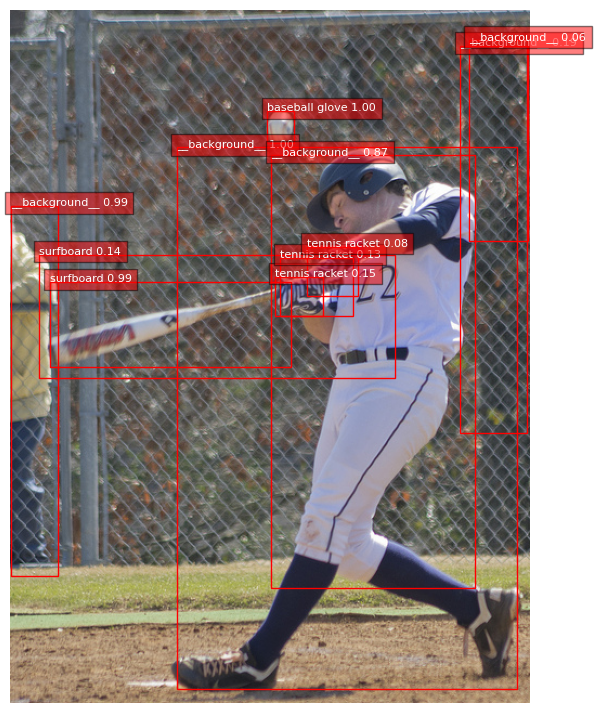

In [ ]:
# Convert tensor image back to numpy for visualization
img = img_tensor.squeeze().detach().cpu().numpy()  # Adjust dimensions as necessary
img = img.transpose(1, 2, 0)  # Rearrange the dimensions from CxHxW to HxWxC for image display

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(img)

# Add bounding boxes and labels
for box, label, score in zip(boxes, labels, scores):
    x1, y1, x2, y2 = box.detach().cpu().numpy()  # Make sure to detach and convert boxes as well
    label_name = COCO_NAMES[label.item()]
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{label_name} {score.item():.2f}', color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # to turn off axes for better visualization
plt.show()

In [ ]:
# Set a threshold for displaying predictions
CONFIDENCE_THRESHOLD = 0.9  # for example, 90%

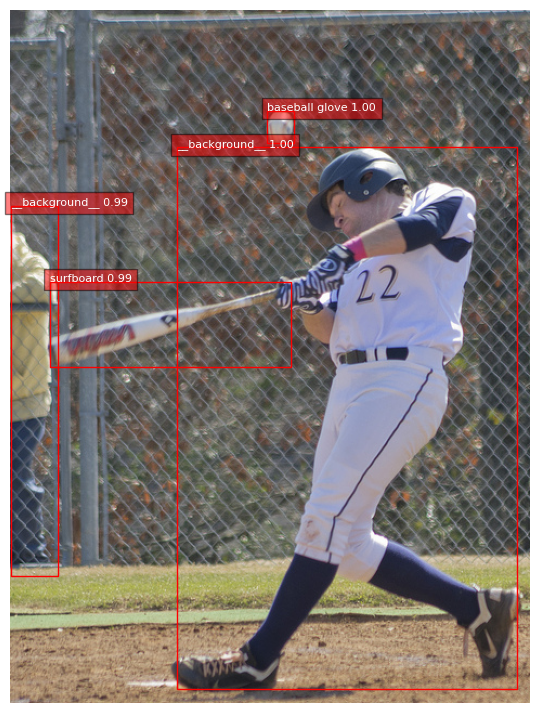

In [ ]:
# Convert tensor image back to numpy for visualization
img = img_tensor.squeeze().detach().cpu().numpy()  # Adjust dimensions as necessary
img = img.transpose(1, 2, 0)  # Rearrange the dimensions from CxHxW to HxWxC for image display

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(img)

# Add bounding boxes and labels
for box, label, score in zip(boxes, labels, scores):
  if score.item() > CONFIDENCE_THRESHOLD:
    x1, y1, x2, y2 = box.detach().cpu().numpy()  # Make sure to detach and convert boxes as well
    # Adjust for potential off-by-one error
    label_index = label.item()  # Assuming model's labels are 0-indexed
    # If labels are 1-indexed, subtract 1: label_index = label.item() - 1
    label_name = COCO_NAMES[label.item()]
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{label_name} {score.item():.2f}', color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # to turn off axes for better visualization
plt.show()

reference:
1.  https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html
2. https://www.v7labs.com/blog/coco-dataset-guide

